<a href="https://colab.research.google.com/github/ChinmayiAnandAradhya/Deep-learning/blob/main/DL_Lab_Modfn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Deep-Learning
#Q1 Write a program to implement XOR gates using Perceptron.(with updation)

import numpy as np

class gates():
    def __init__(self, not_weight=np.array([1]), and_weight=np.array([-1, 1]),
                 or_weight=np.array([1, -4]), or_bias=1, and_bias=-7, not_bias=0.1,
                 initial_learning_rate=0.1) -> None:
        self.not_weight = not_weight
        self.and_weight = and_weight
        self.or_weight = or_weight
        self.or_bias = or_bias
        self.and_bias = and_bias
        self.not_bias= not_bias
        self.learning_rate = initial_learning_rate

    def activation(self, x):
        return 1 if x >= 0 else 0

    def perceptron(self, x, w, b):
        res = np.dot(x, w) + b
        return self.activation(res)

    def NOT_function(self, x):
        x = np.array(x)
        return self.perceptron(x, self.not_weight, self.not_bias)

    def AND_function(self, x):
        x = np.array(x)
        return self.perceptron(x, self.and_weight, self.and_bias)

    def OR_function(self, x):
        x = np.array(x)
        return self.perceptron(x, self.or_weight, self.or_bias)

    def XOR_function(self, x):
        x = np.array(x)

        y0 = self.NOT_function(x[0])
        y1 = self.NOT_function(x[1])
        z1 = self.AND_function([y0, x[1]])
        z2 = self.AND_function([y1, x[0]])

        return self.OR_function([z1, z2])

    def NXOR_function(self, x):
        return self.NOT_function(self.XOR_function(x))

    def update_weight(self, inp, out, tar, weight):
        # Adjust the learning rate based on performance
        if out == tar:
            adaptive_lr = self.learning_rate
        else:
            adaptive_lr = self.learning_rate * 1.1  # modification
        # Update weights
        res = weight + adaptive_lr * (tar - out) * inp
        return res

    def update_not(self):
        inp = np.array([1, 0])
        tar = np.array([0, 1])

        i = 0
        while i < len(inp):
            out = self.NOT_function(inp[i])
            if tar[i] != out:
                weight = self.not_weight
                self.not_weight = self.update_weight(inp[i], out, tar[i], self.not_weight)
                self.not_biase += 0.1 * (tar[i] - out)  # Keep some bias update if needed
                print(self.not_weight, self.not_bias)
                i = 0
            else:
                i += 1

    def update_and(self):
        inp = np.array([(0, 0), (1, 0), (0, 1), (1, 1)])
        tar = np.array([0, 0, 0, 1])

        i = 0
        while i < len(inp):
            out = self.AND_function(inp[i])
            if tar[i] != out:
                weight = self.and_weight
                self.and_weight = self.update_weight(inp[i], out, tar[i], self.and_weight)
                self.and_bias += 0.1 * (tar[i] - out)  # Keep some bias update if needed
                print(self.and_weight, self.and_bias)
                i = 0
            else:
                i += 1

    def update_or(self):
        inp = np.array([(0, 0), (1, 0), (0, 1), (1, 1)])
        tar = np.array([0, 1, 1, 1])

        i = 0
        while i < len(inp):
            out = self.OR_function(inp[i])
            if tar[i] != out:
                weight = self.or_weight
                self.or_weight = self.update_weight(inp[i], out, tar[i], self.or_weight)
                self.or_bias += 0.1 * (tar[i] - out)  # Keep some bias update if needed
                print(self.or_weight, self.or_bias)
                i = 0
            else:
                i += 1



Training with SGD optimizer
Epoch 1/50 - SGD loss: 1.0522 - val_loss: 1.3068
Epoch 2/50 - SGD loss: 1.0054 - val_loss: 1.3018
Epoch 3/50 - SGD loss: 0.9845 - val_loss: 1.2949
Epoch 4/50 - SGD loss: 0.9724 - val_loss: 1.3053
Epoch 5/50 - SGD loss: 0.9638 - val_loss: 1.2970
Epoch 6/50 - SGD loss: 0.9551 - val_loss: 1.2953
Epoch 7/50 - SGD loss: 0.9492 - val_loss: 1.2961
Epoch 8/50 - SGD loss: 0.9441 - val_loss: 1.2997
Epoch 9/50 - SGD loss: 0.9393 - val_loss: 1.2921
Epoch 10/50 - SGD loss: 0.9355 - val_loss: 1.3061
Epoch 11/50 - SGD loss: 0.9325 - val_loss: 1.3039
Epoch 12/50 - SGD loss: 0.9298 - val_loss: 1.2993
Epoch 13/50 - SGD loss: 0.9241 - val_loss: 1.2956
Epoch 14/50 - SGD loss: 0.9211 - val_loss: 1.2996
Epoch 15/50 - SGD loss: 0.9181 - val_loss: 1.3028
Epoch 16/50 - SGD loss: 0.9144 - val_loss: 1.3045
Epoch 17/50 - SGD loss: 0.9120 - val_loss: 1.2958
Epoch 18/50 - SGD loss: 0.9105 - val_loss: 1.2969
Epoch 19/50 - SGD loss: 0.9069 - val_loss: 1.3068
Epoch 20/50 - SGD loss: 0.9024

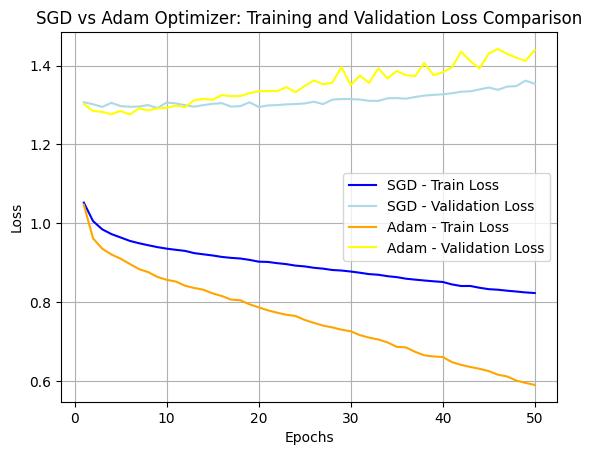

In [ ]:
#Q2
#added validation data
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import numpy as np
import matplotlib.pyplot as plt

# 1. Create synthetic data
def create_data():
    X = np.random.randn(1000, 10)
    y = np.random.randn(1000, 1)
    return X, y

# 2. Define a simple deep neural network
def create_model():
    model = models.Sequential([
        layers.Dense(50, activation='relu', input_shape=(10,)),
        layers.Dense(20, activation='relu'),
        layers.Dense(1)
    ])
    return model

# 3. Train the model and capture both training and validation loss values
def train_model_with_history(model, optimizer, X, y, batch_size, epochs, optimizer_name, validation_split=0.2):
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    history = model.fit(X, y, batch_size=batch_size, epochs=epochs, validation_split=validation_split, verbose=0)
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs} - {optimizer_name} loss: {train_loss[epoch]:.4f} - val_loss: {val_loss[epoch]:.4f}")
    return train_loss, val_loss

# 4. Compare performance of SGD and Adam
# Load data
X, y = create_data()

# Create models for SGD and Adam
model_sgd = create_model()
model_adam = create_model()

# Optimizers
optimizer_sgd = optimizers.SGD(learning_rate=0.01)
optimizer_adam = optimizers.Adam(learning_rate=0.001)

# Set training parameters
epochs = 50
batch_size = 32

# Train models and capture both training and validation loss history
print("\nTraining with SGD optimizer")
sgd_loss, sgd_val_loss = train_model_with_history(model_sgd, optimizer_sgd, X, y, batch_size, epochs, 'SGD')

print("\nTraining with Adam optimizer")
adam_loss, adam_val_loss = train_model_with_history(model_adam, optimizer_adam, X, y, batch_size, epochs, 'Adam')

# 5. Plot the loss curves for comparison
plt.plot(range(1, epochs + 1), sgd_loss, label='SGD - Train Loss', color='blue')
plt.plot(range(1, epochs + 1), sgd_val_loss, label='SGD - Validation Loss', color='lightblue')
plt.plot(range(1, epochs + 1), adam_loss, label='Adam - Train Loss', color='orange')
plt.plot(range(1, epochs + 1), adam_val_loss, label='Adam - Validation Loss', color='yellow')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("SGD vs Adam Optimizer: Training and Validation Loss Comparison")
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 48ms/step - accuracy: 0.3321 - loss: 1.8020 - val_accuracy: 0.5546 - val_loss: 1.2366
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.5750 - loss: 1.2017 - val_accuracy: 0.6107 - val_loss: 1.1009
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.6381 - loss: 1.0327 - val_accuracy: 0.6499 - val_loss: 1.0020
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.6773 - loss: 0.9219 - val_accuracy: 0.6878 - val_loss: 0.9112
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.7062 - loss: 0.8476 - val_accuracy: 0.6884 - val_loss: 0.9055
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 49ms/step - accuracy: 0.7249 - loss: 0.7886 - val_accuracy: 0.6935 - val_loss: 0.8853
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 50ms/step - accuracy: 0.7415 - loss: 0.7415 - val_accuracy: 0.6959 - val_loss: 0.8873
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 55ms/step - accuracy: 0.7540 -

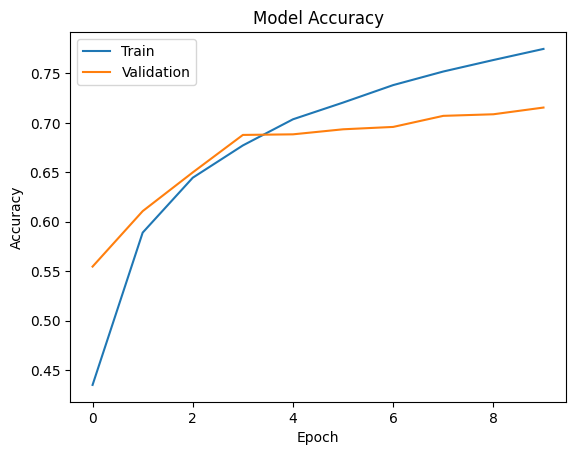

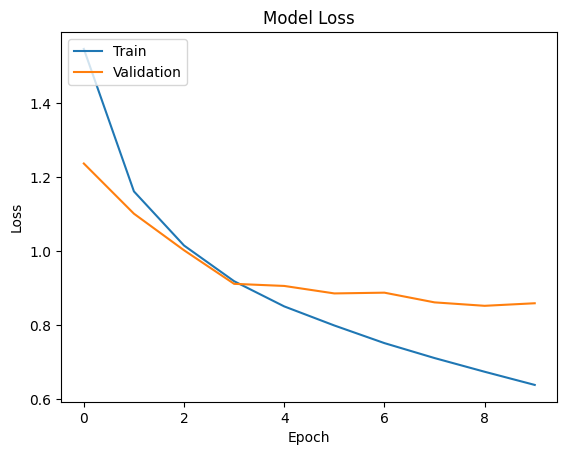

In [ ]:
#Q3
#FOR COLORED IMAGES
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Define the CNN model for colored images
model = models.Sequential()

# Add convolutional layers, followed by pooling layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add dense layers for classification
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.4f}")

# Plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
!pip install ultralytics
!pip install deep_sort_realtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.9/896.9 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 48.4 MB/s eta 0:00:00


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 21.5M/21.5M [00:00<00:00, 134MB/s] 



0: 384x640 17 persons, 435.4ms
Speed: 9.1ms preprocess, 435.4ms inference, 29.1ms postprocess per image at shape (1, 3, 384, 640)


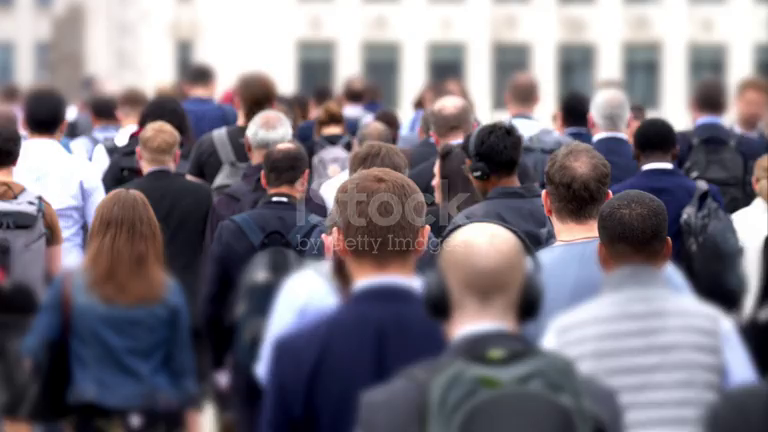


0: 384x640 15 persons, 439.9ms
Speed: 5.7ms preprocess, 439.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


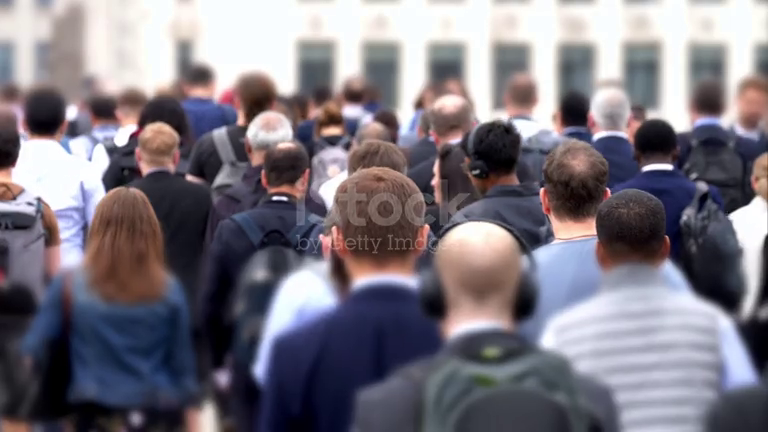


0: 384x640 15 persons, 461.6ms
Speed: 4.2ms preprocess, 461.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


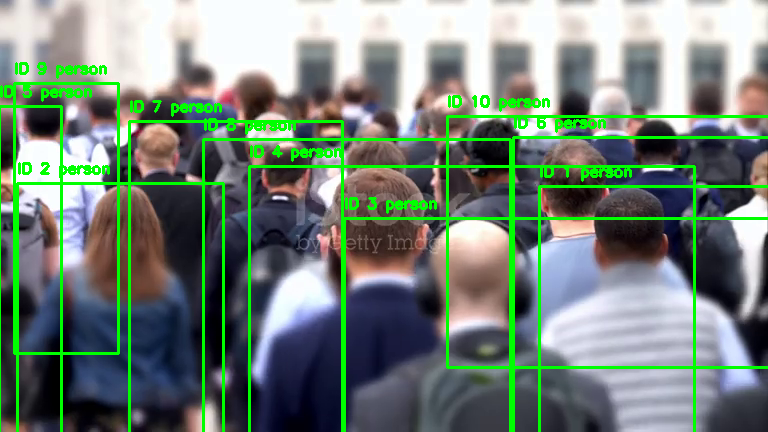


0: 384x640 17 persons, 1 handbag, 457.7ms
Speed: 4.1ms preprocess, 457.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


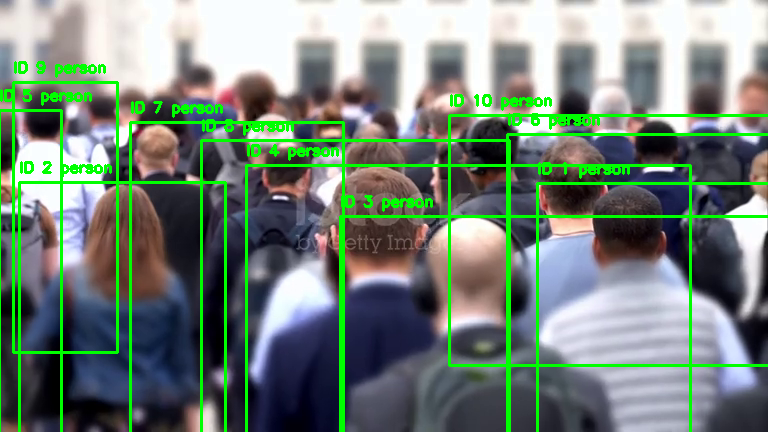


0: 384x640 16 persons, 1 handbag, 442.8ms
Speed: 6.3ms preprocess, 442.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


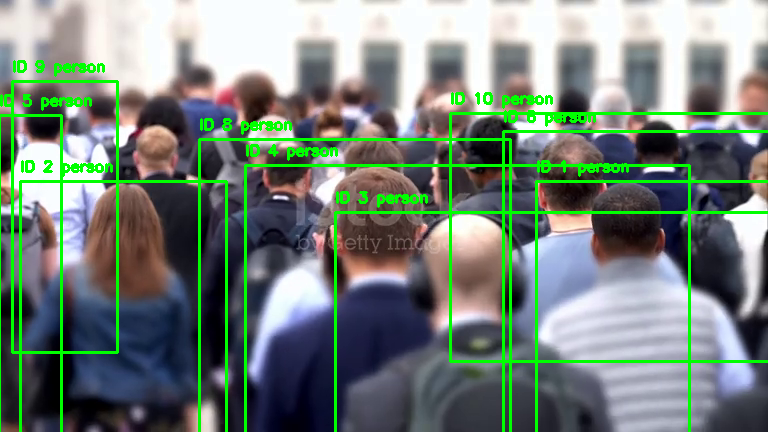


0: 384x640 17 persons, 1 handbag, 666.6ms
Speed: 6.5ms preprocess, 666.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


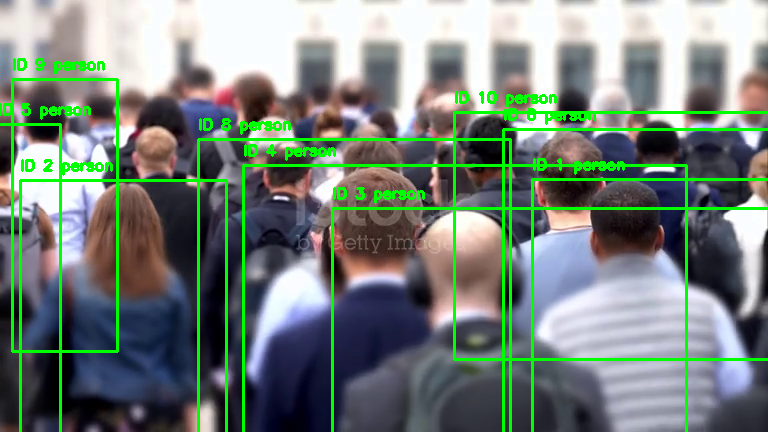


0: 384x640 16 persons, 1 handbag, 634.7ms
Speed: 3.4ms preprocess, 634.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


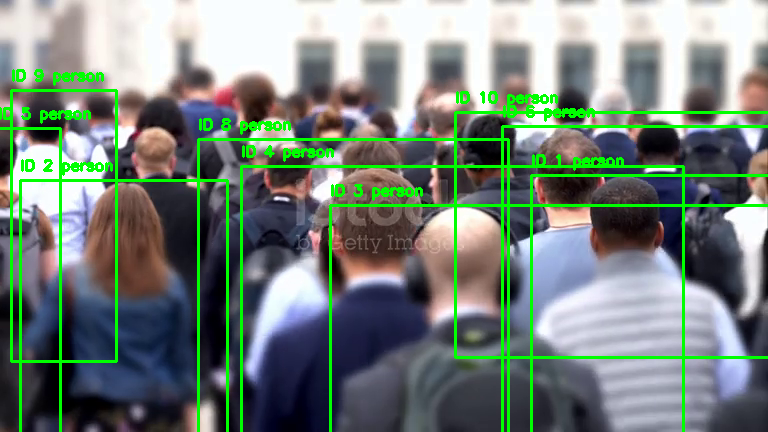


0: 384x640 15 persons, 677.5ms
Speed: 3.4ms preprocess, 677.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


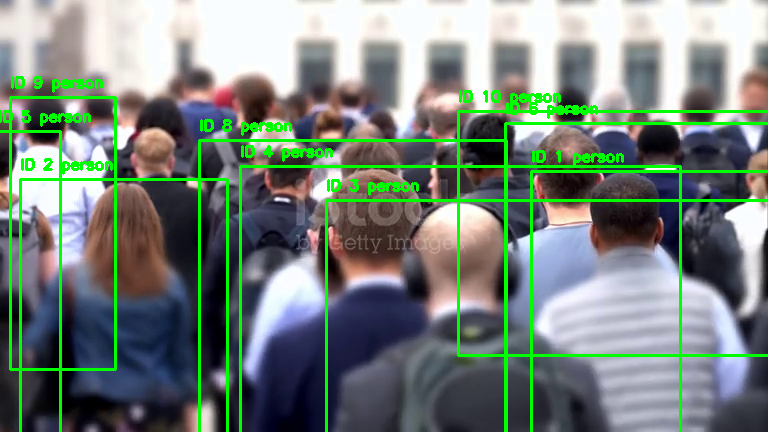


0: 384x640 16 persons, 708.2ms
Speed: 3.8ms preprocess, 708.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


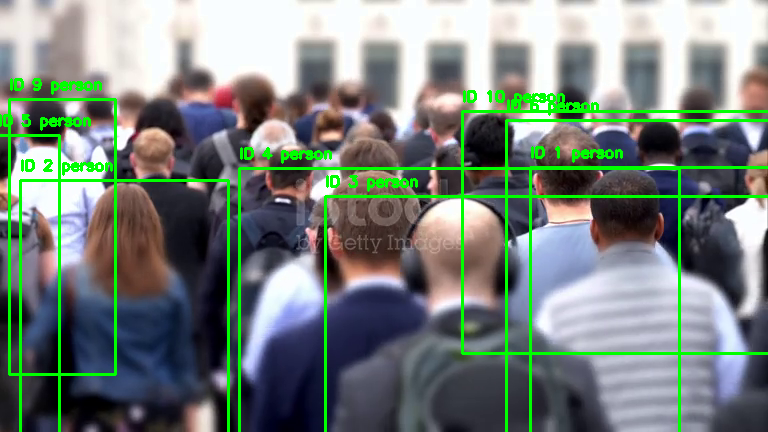


0: 384x640 15 persons, 582.7ms
Speed: 3.6ms preprocess, 582.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


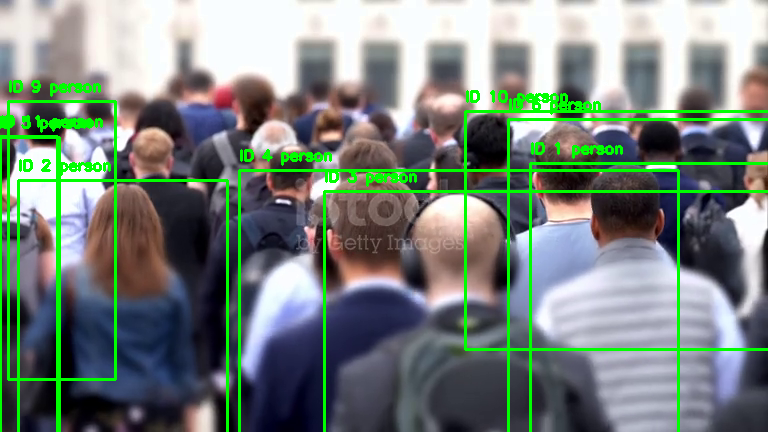


0: 384x640 16 persons, 574.1ms
Speed: 4.4ms preprocess, 574.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 persons, 555.3ms
Speed: 5.0ms preprocess, 555.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 persons, 529.1ms
Speed: 7.0ms preprocess, 529.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 persons, 525.3ms
Speed: 3.4ms preprocess, 525.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 1 handbag, 661.3ms
Speed: 20.6ms preprocess, 661.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 persons, 1 handbag, 553.5ms
Speed: 14.4ms preprocess, 553.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 persons, 466.3ms
Speed: 3.6ms preprocess, 466.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 persons, 460.3ms
Speed: 3.3ms preprocess, 460.3ms i

In [ ]:
#Q4
from google.colab.patches import cv2_imshow
import cv2
from ultralytics import YOLO
from deep_sort_realtime.deepsort_tracker import DeepSort

# Load the YOLO model
model = YOLO('yolov8s.pt')  # Replace 'yolov8s.pt' with your desired YOLO model

# Initialize DeepSORT tracker
tracker = DeepSort(max_age=30, n_init=3, nn_budget=70)

def detect_and_track_objects(video_path, output_path=None, confidence_threshold=0.5):
    # Open the video file
    video = cv2.VideoCapture(video_path)
    if not video.isOpened():
        print(f"Error: Could not open video {video_path}")
        return

    # Get video properties
    frame_width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(video.get(cv2.CAP_PROP_FPS))

    # Define the codec and create VideoWriter if saving output
    out = None
    if output_path:
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4
        out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

    frame_count = 0  # To limit frames shown in Colab
    while True:
        ret, frame = video.read()
        if not ret:
            break

        # Perform object detection on the frame
        results = model(frame)

        detections = []
        for result in results:
            for box in result.boxes:
                if box.conf >= confidence_threshold:
                    x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())  # Box coordinates
                    conf = box.conf.item()  # Confidence score
                    cls = int(box.cls.item())  # Class ID

                    # Append detection for tracking
                    detections.append(([x1, y1, x2, y2], conf, cls))

        # Update the DeepSORT tracker
        tracks = tracker.update_tracks(detections, frame=frame)

        # Draw detections and track IDs on the frame
        for track in tracks:
            if not track.is_confirmed() or track.time_since_update > 1:
                continue

            track_id = track.track_id
            bbox = track.to_tlbr()  # Get bounding box in (top-left, bottom-right) format

            x1, y1, x2, y2 = map(int, bbox)

            # Retrieve label safely
            if track.det_class is not None and track.det_class < len(model.names):
                label = model.names[track.det_class]
            else:
                label = "Unknown"

            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, f"ID {track_id} {label}", (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Display the frame in Colab
        if frame_count < 10:  # Display the first 10 frames
            cv2_imshow(frame)
            frame_count += 1

        # Write frame to output video
        if out:
            out.write(frame)

    # Release video objects
    video.release()
    if out:
        out.release()

if __name__ == "__main__":
    VIDEO_PATH = "/content/istockphoto-1569247199-640_adpp_is.mp4"
    OUTPUT_PATH = "/content/output_video.mp4"
    detect_and_track_objects(VIDEO_PATH, OUTPUT_PATH)

In [ ]:
#1 a) Update function for XOR b) Use a inbuilt API Perceptron to compute XOR operation
#2 Compare SGD and Adam optimizer
#3 Implement CNN model on cifar-10 dataset (colored)
#4 Object detection using YOLO and object tracking using DeepSort